# Week X - Unsupervised Learning

<hr style="border:2px solid gray">

# Index: <a id='index'></a>

1. [Introduction to Unsupervised Learning](#intro)
1. [K-Means](#KM)
1. [DBSCAN](#DBSCAN)
1. [Appendix](#appendix)
    

<hr style="border:2px solid gray">

# Introduction to Unsupervised Learning [^](#index) <a id='intro'></a>

_Previously, we have briefly discussed unsupervised learning in Week X - Basics of Machine Learning 1. We will reiterate many of the key points here._

Unsupervised learning is when **we don't have the answer to what we are looking for** i.e. when we don't have the target (or our data is **unlabelled**). This means we are unable to train our favourite classifier. 

Instead, we need to be able to train a model to pick things that are "**the same**". For example, we could try to distinguish coins based on weight and diameter without know which coin is which. Note that any model that make use of **dimensionality reduction** will be a form of unsupervised learning since we consider the variance of the **data** rather than that of the **targets**.

The most common form of unsupervised learning is **clustering**, and the most common form of clustering is **K-Means**. There are other common forms that will not be discussed in this notebook, such as fault detection and density estimation.

<hr style="border:2px solid gray">

# K-Means [^](#index) <a id='KM'></a>

K-means can take an unlabeled data set and group it into a set number (K) of clusters. 

To demonstrate this, let us generate some random data made up of clusters.

In [38]:
import numpy as np
import scipy as sp
import sklearn as sk
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

In [8]:
from sklearn.datasets import make_blobs

def setup():
    blob_centers = np.array(
        [[ 0.2,  2.3],
         [-1.5 ,  2.3],
         [-2.8,  1.8],
         [-2.8,  2.8],
         [-2.8,  1.3]])
    blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
    X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)
    return (X, y)


In [9]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

[[-2.69823941  1.3454702 ]
 [-2.87459835  1.8097575 ]
 [ 0.96077126  1.17046777]
 ...
 [-2.80303543  2.72948115]
 [ 0.24057359  2.40103109]
 [-2.63807768  1.95621065]]


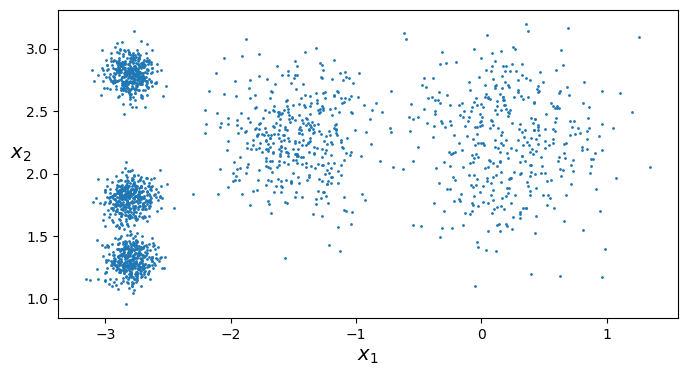

In [10]:
X, y= setup()
plt.figure(figsize=(8, 4))
plot_clusters(X)
print(X)
plt.show()

We have created five new blobs of data, however we need to make a model that can identify each blob. If we knew the centroids of each blob or the identity of each entry, this task would be easy. However, in unsupervised learning, we have neither of these.

K-Means starts by randomly selecting centroids and classifying each instance based on its nearest centroid. It then updates the centroids using the associated data. This process continues iteratively, with instances being reclassified and centroids recalculated until the centroids no longer move. This is a simple, yet effective, approach. <a id='KM_explain'></a>

However, a downside of K-means is you must define **how many clusters to look for**.

A worked code example, with a more detailed explanation of the algorithm, is given in the Appendix Section [K-Means Worked Code](#K-means_app)

Let's give it a try here:

In [11]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [12]:
print(y_pred[0:20])

[4 0 1 0 0 4 0 0 3 0 0 0 0 4 0 4 2 3 2 1]


In [13]:
kmeans.cluster_centers_ # to find the centres of the clusters

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

Let's look at how well it did:

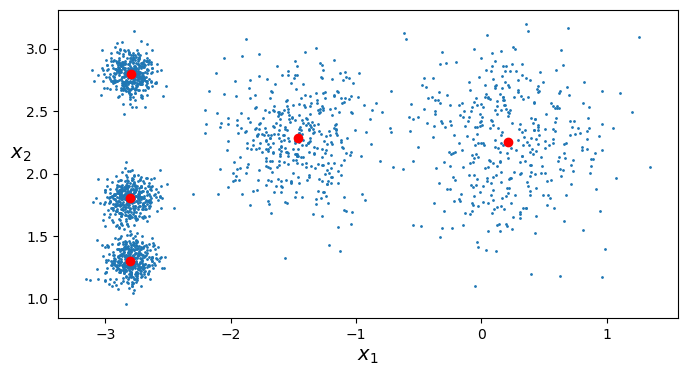

In [202]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
#print(X)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],"ro")
#print(kmeans.inertia_)
plt.show() # pretty good

We can then use the model to predict the labels for new data

In [203]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
#try adding some more data to see what happens

kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

We can plot the decision boundaries as a Voronoi plot (code taken straight from {homl}):

In [216]:
def plot_data(X):
    # Plotting data points from input X
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)  
    

def plot_centroids(centroids, weights=None, cross_color='r'):
    
    ################# FS- Is this necessary? It is never called
    
    
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
        
    ################
    
    plt.scatter(centroids[:, 0], centroids[:, 1],  # Plot centroids
                marker='x', s=10, linewidths=15,
                color=cross_color, zorder=11, alpha=1)
    

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1 
    maxs = X.max(axis=0) + 0.1
    
    # Generate grid of points in the defined limits
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),  
                         np.linspace(mins[1], maxs[1], resolution))
    
    
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])  # Perform clustering on the grid points
    Z = Z.reshape(xx.shape)  # Reshape results to have same shape as the grid

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  # Plot the filled contours (decision boundaries)
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  # Plot the contour lines
                linewidths=1, colors='k')
    
    plot_data(X)  # Plot the original data
    
    if show_centroids:
        # Plot the centroids if specified
        plot_centroids(clusterer.cluster_centers_)  

    if show_xlabels:
        # Show x-axis label if specified
        plt.xlabel("$x_1$", fontsize=14)  
    else:
        # Hide x-axis labels
        plt.tick_params(labelbottom=False)  
        
    if show_ylabels:
        # Show y-axis label if specified
        plt.ylabel("$x_2$", fontsize=14, rotation=0)  
    else:
        # Hide y-axis labels
        plt.tick_params(labelleft=False)  


[4 4 4 ... 1 1 1]


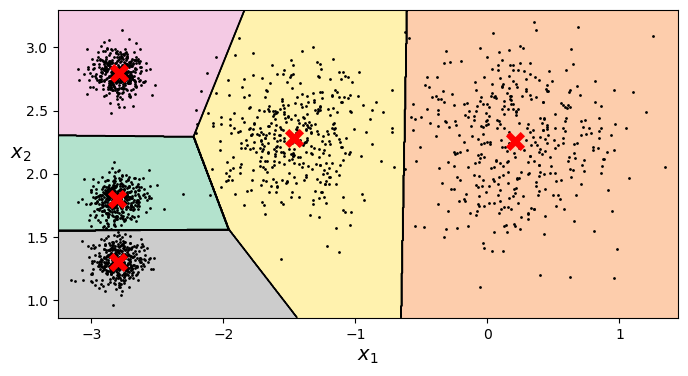

In [217]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

If we happen to have a vague idea of where the centroids are, we can give the model starting positions for the clusters:
```python
init_guess=np.array([-3,1.0],[-3,2],[-3,3],[-1,2],[0,2])
kmeans=KMeans(n-cluster=5,init=init_guess,n_inits=5)
```

### Inertia

When the K-Means algorithm is called, it actually runs several times. The number of times it runs is given by ```n_inits``` and the default value is 10. K-Means then uses a performance algorithm to detemine which is the best run and keeps that one. The performance metric is called **inertia** and is defined as the mean squared distance between each centroid and the instances associated with it. 

kmeans can return this value if called:

In [30]:
kmeans.inertia_

211.5985372581684

<div style="background-color:#C2F5DD">

### Exercise
Plot what happens to the inertia score as you change the number of centroids in your algorithm. Can you use this to determine how many centroids you should have?

<div style="background-color:#C2F5DD">

### Exercise: K-Means with Iris Datatset <a id='K-means_iris'></a>
    
Below is the code to use the K-Means algorithm on the iris data (i.e. to separate the classes out without using labels). Even though we have only been using 2D to show plots, the algorithm will happily run in multiple dimensions.
    
Experiment with finding a method to measure the accuracy of this model. Note that the labels used my the iris dataset are not necessarily the same as the K-means cluster labelling.
    
Although the iris dataset only has three types of flower, try changing the number of clusters (and thus have multiple clusters for the same label). Does this improve accuracy?
    
_An example solution to this is given in Appendix Section [Exercise Solution: K-Means with Iris Dataset](#iris_ex_app)_

In [31]:
import numpy as np
import scipy as sp 
from sklearn.datasets import load_iris
iris=load_iris()

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'],iris['target'], test_size=0.2)


# Try changing this value
k = 3 #4


kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
y_pred = kmeans.fit_predict(X_train)

In [103]:
yp=kmeans.predict(X_test)

In [99]:
print(yp)
print()
print(y_test)
# As predicted, the labels are not aligned
# This must be resolved before the accuracy can be calculated

[2 2 2 1 1 2 2 2 2 2 2 1 0 2 2 2 0 2 0 0 2 1 2 0 2 1 1 0 2 1]

[2 1 1 0 0 1 1 1 1 1 1 0 2 1 2 1 2 1 2 2 1 0 1 2 1 0 0 2 2 0]


<hr style="border:2px solid gray">

# DBSCAN [^](#index) <a id='DBSCAN'></a>

**DBSCAN** stands for 'Density-Based Spatial Clustering of Applications with Noise'.

DBSCAN is a popular clustering algorithm used in machine learning and data mining. Unlike K-Means, which requires specifying the number of clusters in advance, DBSCAN automatically determines the number of clusters based on the density of the data.

DBSCAN operates by grouping together data points that are close to each other and lie in a dense region, while separating regions of lower density. The algorithm identifies **core points** which have a sufficient number of neighboring points within a specified distance ($\epsilon$). It then expands clusters by including reachable points within this distance. Any points that are not part of a cluster are considered **outliers** or noise.

Practical usage: In high-energy physics experiments, particle tracks are reconstructed from the signals recorded by particle detectors. DBSCAN can then be applied to identify and group together the recorded signals that belong to the same particle track. By clustering these signals based on their spatial proximity, DBSCAN helps to accurately restore the paths of the particles.

A worked code example, with a more detailed explanation of DBSCAN, is given in the Appendix Section [DBSCAN Worked Code](#DBSCAN_app)


<div style="background-color: #FFF8C6">

### Optional Example

We have a dataset of particles with two features: momentum and charge. The goal is to group these particles based on these two features.
    
# Replace this example?????

Here, we are simulating data from four types of particles, each with different distributions of momentum and charge:

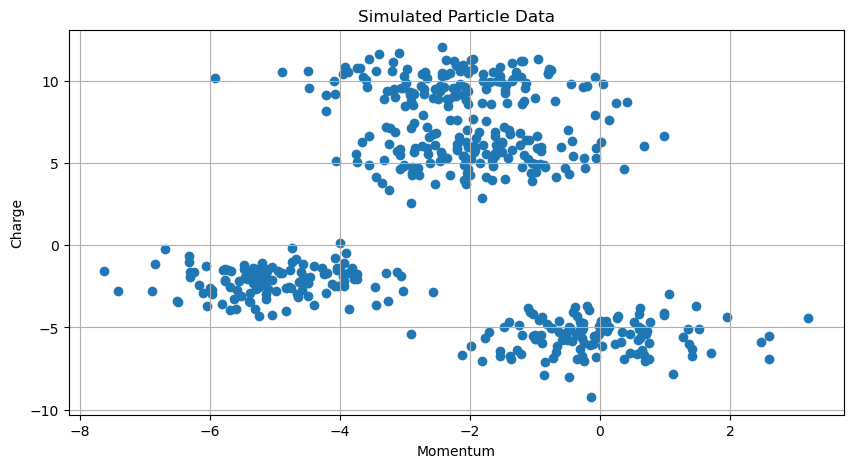

In [435]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

np.random.seed(50)

# Make up data for 4 different particles
data, _ = make_blobs(n_samples=500, centers=4, cluster_std=1)

# The first feature is momentum, the second is charge
momentum = data[:, 0]
charge = data[:, 1]

plt.scatter(momentum, charge)
plt.xlabel('Momentum')
plt.ylabel('Charge')
plt.title('Simulated Particle Data')
plt.grid(True)
plt.show()


<div style="background-color: #FFF8C6">

We can now use DBSCAN to identify the particle types.

DBSCAN takes two parameters: 
- ```eps``` : specifies the maximum distance between two samples for them to be considered as in the same neighborhood
- ```min_samples``` : the number of samples in the neighborhood of a point for it to be considered a core point. 
    
Try to alter these values in the code below to see how the plot changes.

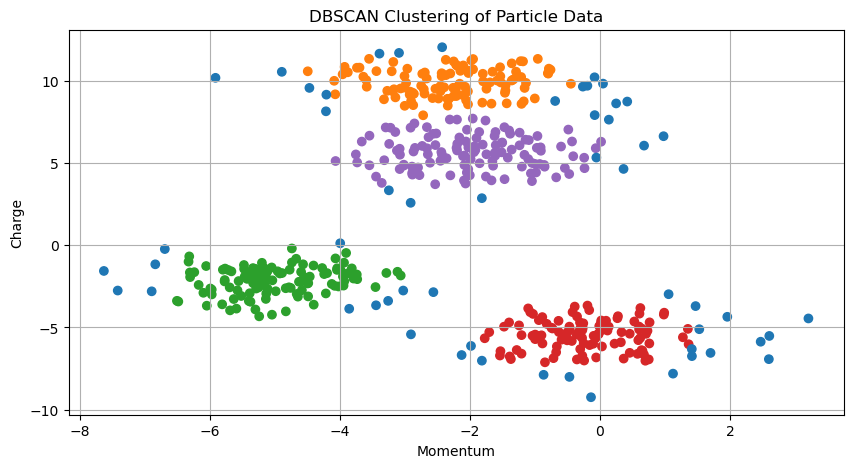

In [434]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN on data
dbscan = DBSCAN(eps=0.7, min_samples=10)
clusters = dbscan.fit_predict(data)
cmap = cm.get_cmap('tab10')


# Plot the clustered data
# The colour of the points demonstrate how DBSCAN has separated the data

plt.scatter(momentum, charge, color=cmap(clusters+1))
plt.xlabel('Momentum')
plt.ylabel('Charge')
plt.title('DBSCAN Clustering of Particle Data')
plt.grid(True)
plt.show()


<hr style="border:2px solid gray">
<hr style="border:2px solid gray">

<div style="background-color:#efdff2">

# Appendix <a id='appendix'></a>

[Return to Index](#index)

In this section, you will find longer pieces of mathematics and code which are **non-examinable**. Please read at your own discretion

- A. [K-Means Worked Code](#K-means_app)
- B. [Exercise Solution: K-Means with Iris Dataset](#iris_ex_app)
- C. [DBSCAN Worked Code](#DBSCAN_app)

<hr style="border:2px solid gray">

<div style="background-color:#efdff2">

## A. K-Means Worked Code [^^](#appendix) <a id='K-Means_app'></a>

[Return to relevant section in notes](#KM_explain) 
    
_References: [The Math behind K-Means Clustering](https://medium.com/@draj0718/the-math-behind-k-means-clustering-4aa85532085e)_
    
For this worked code example, we'll use the same clusters as seen previously. 
    
Firstly, we randomly select K data points to be our predicted clump centres.

In [354]:
def initial_centroids(X, k=5, plot = False, set_rand=False):
    
    if set_rand:
        np.random.seed(9001)
        
    length=len(X)

    centroids_index=np.random.randint(0, high=length, size = k)
    centroids=np.array([np.array(X[i]) for i in centroids_index])
    
    if plot:
        plot_clusters(X)

        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=10, linewidths=10, 
                    color='black', zorder=20, alpha=1)
        plt.show()
        
    return (centroids)

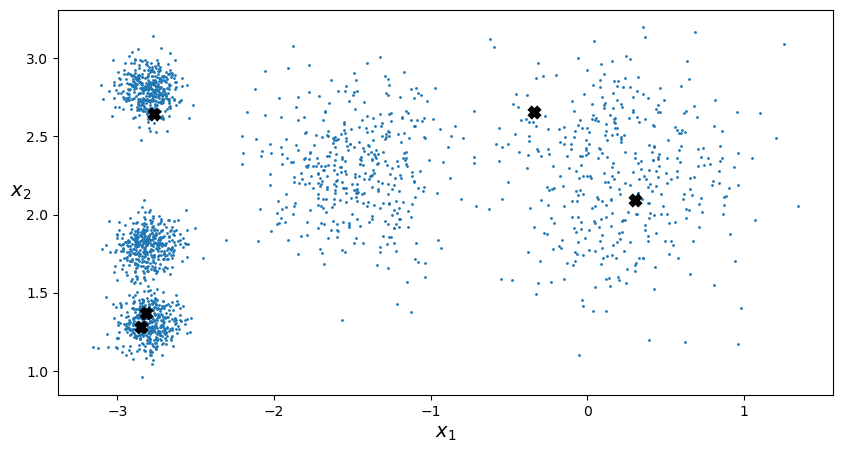

In [355]:
X, _ = setup()
centroids = initial_centroids(X, k=5, plot = True, set_rand = True)

<div style="background-color:#efdff2">
    
We now group each point based on which centroid they are closest to (using the Euclidian distance). We can also choose to sum these distances to find the **inertia** (see below for its use).

In [356]:
def closest_centroid(X, centroids, contour=False):
    
    contour_arr=[]
    cluster_list=[]
    inertia=0
    
    for i in range(k):
        cluster_list.append([])

    for point in X:
        min_dist_sq=np.inf
        min_centroid_num=0

        for num, centre in enumerate(centroids):           
            dist_sq = (centre[0]-point[0])**2 + (centre[1]-point[1])**2
            
            if dist_sq< min_dist_sq:
                min_dist_sq = dist_sq
                min_centroid_num = num

        cluster_list[min_centroid_num].append(point)
        inertia += np.sqrt(min_dist_sq)
            
            
        if contour:
            contour_arr.append(min_centroid_num)
    
    cluster_arr=np.array([np.array(l) for l in cluster_list], dtype=object)
    if contour:        
        return np.array(contour_arr, dtype=object)

    else:
        return np.array(cluster_arr, dtype=object), inertia


In [369]:
def plot_model(centroids, cluster_arr,  ax = 0, resolution = 500, colors= 'tab10'):
    
    if not ax:
        ax= plt.subplot(111)
    
    cmap = cm.get_cmap(colors)
            
    mins = X.min(axis=0) - 0.1 
    maxs = X.max(axis=0) + 0.1
    
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),  
                         np.linspace(mins[1], maxs[1], resolution))

    
    Z = closest_centroid(np.c_[xx.ravel(), yy.ravel()], centroids, contour=True)
    Z = np.array(Z).reshape(xx.shape) 
    
    ax.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap = cmap, alpha=0.3) 
    ax.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')

    for num, arr in enumerate(cluster_arr):
        ax.scatter(arr[:,0], arr[:,1], s=1, color= cmap(num))
        
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=10, linewidths=10, 
                color='black', zorder=20, alpha=1)


Inertia:  894.5178494861835


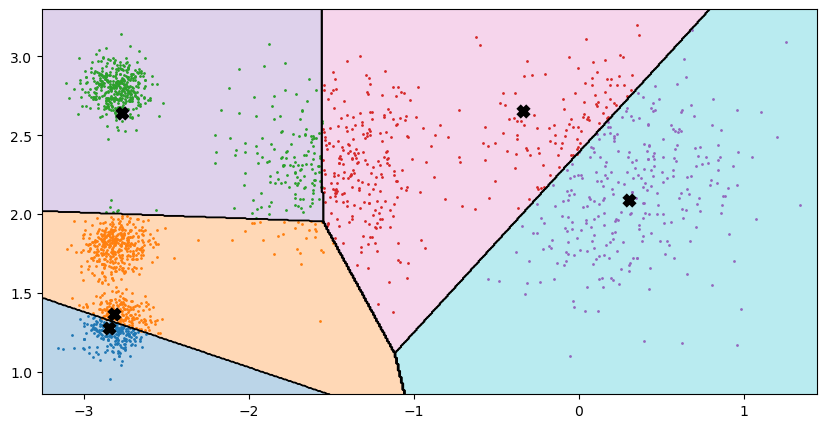

In [359]:
cluster_arr, inertia  = closest_centroid(X, centroids)
print ('Inertia: ', inertia)
plot_model(centroids, cluster_arr)

<div style="background-color:#efdff2">

The contour plot displays how our model is currently dividing the data. We can see that the contour line divisions do not match our clumps.

To improve our model we must have an improved guess of the centroids position. We find this by finding the **average** position over all the points in each grouping. Note the decrease in inertia - this suggests points are now closer to their relevant centroid and hence the model is a better fit.

In [360]:
def find_centroids(cluster_arr):
    new_centroids = []
    for arr in cluster_arr:
        x_avg = np.average(arr[:, 0])
        y_avg = np.average(arr[:, 1])
        new_centroids.append(np.array([x_avg, y_avg]))
     
    return np.array(new_centroids)

Inertia:  694.0932723993552


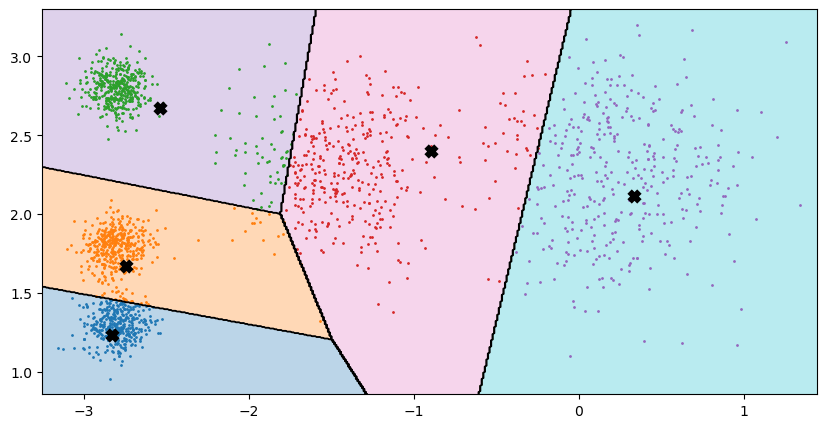

In [361]:
centroids = find_centroids(cluster_arr)

cluster_arr, inertia  = closest_centroid(X, centroids)
print ('Inertia: ', inertia)
plot_model(centroids, cluster_arr)

<div style="background-color:#efdff2">

We repeat this process of calculating centroids and reclassifying the points until one of the stopping conditions is met:
- The centroid positions do not change between iterations
- The maximum number of iterations are reached
    
We can combine our code so far to see a complete K-means algorithm.

In [411]:
def kmeans_one(X, k=5, max_iter=45, plot_cont=False):
    
    centroids = initial_centroids(X, k=5, plot = False)
    
    if plot_cont:
        plt.figure(figsize=(15, 12))
    
    for i in range(max_iter):

        prev = centroids[:]
        cluster_arr, inertia=closest_centroid(X, centroids)
        
        if plot_cont:
            if i % 5 == 0:
                ax = plt.subplot(3, 3, (i // 5 + 1))
                
                ax.set_title(str(i+1) + " Iteration(s)", fontsize=16)
                plot_model(centroids, cluster_arr, ax=ax)
                               
        centroids = find_centroids(cluster_arr)
                   
        if np.array_equal(prev,centroids):
            plt.show()
            if plot_cont:
                print ('Centroids are consistant after', i,'iterations')
            break 
    
    return centroids, cluster_arr, inertia
          

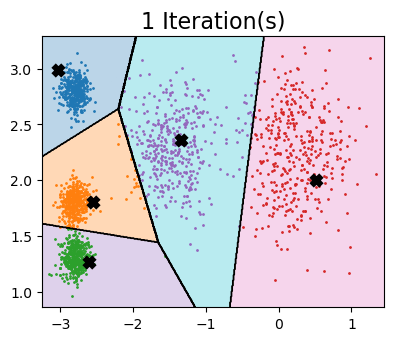

Centroids are consistant after 4 iterations


In [412]:
X, _ = setup()

centroids, cluster_arr, inertia = kmeans_one(X, k=5, max_iter=45, plot_cont=True)

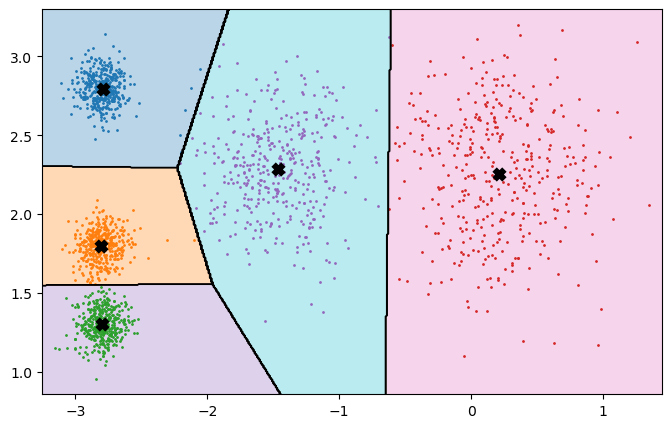

Inertia:  493.74457285479315


In [415]:
plt.figure(figsize=(8, 5))
plot_model(centroids, cluster_arr)
plt.show()

print ('Inertia: ', inertia)

<div style="background-color:#efdff2">

Try running the cell above a few more times. As you can (probably) see from the output, the algorithm is heavily dependent on the random starting positions of the centroids. This is why we repeat the process a number of times with different random starting values, and choose the run which minimises **inertia**. **Inertia** is the some of the Euclidian distance between the points and the centroids.

In [409]:
def k_means(k=5, runs=9, max_iter=50):
    X, _ = setup()
    min_inertia = np.inf
    centre_list=[]
    cluster_list=[]
    
    for i in range(runs):
        
        centres, cluster_arr, inertia = kmeans_one(X, k=k, max_iter=max_iter, plot_cont=False)
        
        centre_list.append(centres)
        cluster_list.append(cluster_arr)
        
        if inertia <  min_inertia:
            min_inertia = inertia
            min_centres = centres
            min_cluster = cluster_arr
            num =i+1
        
    plt.figure(figsize=(15, 12))
    count=1
    for centres, cluster_arr in zip (centre_list, cluster_list):
        ax = plt.subplot(3, 3, (count))
        ax.set_title(str(count) + " run(s)", fontsize=16)
        plot_model(centres, cluster_arr, ax=ax)
        count+=1
             
    plt.show()
    
    
    plt.figure(figsize=(10, 7))
    
    print ('Final Plot with Minimum Inertia, run no.',num)        
    plot_model(min_centres, min_cluster)
    plt.show()
    
    return min_centres, min_inertia
 

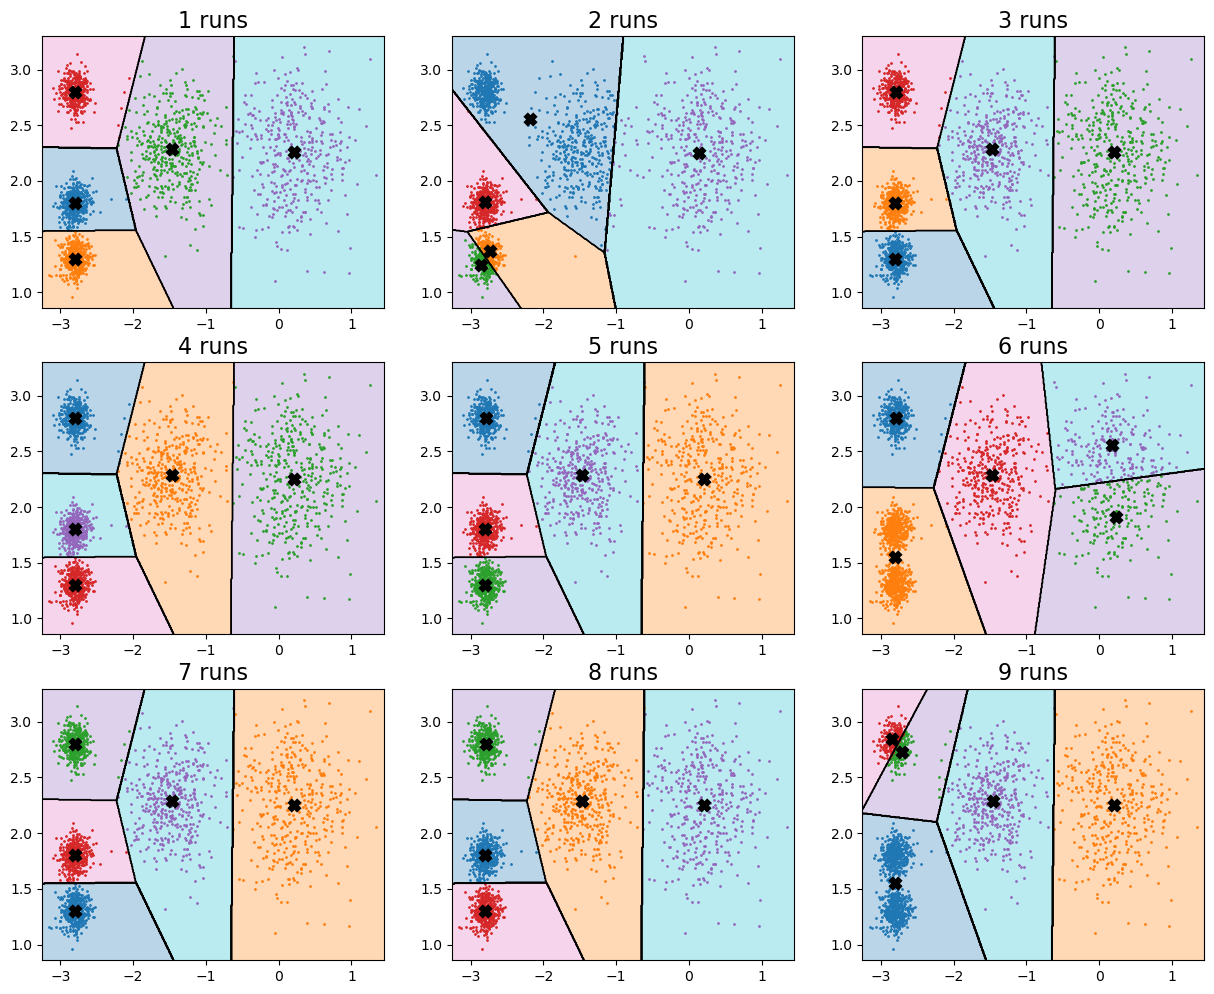

Final Plot with Minimum Inertia, run no. 1


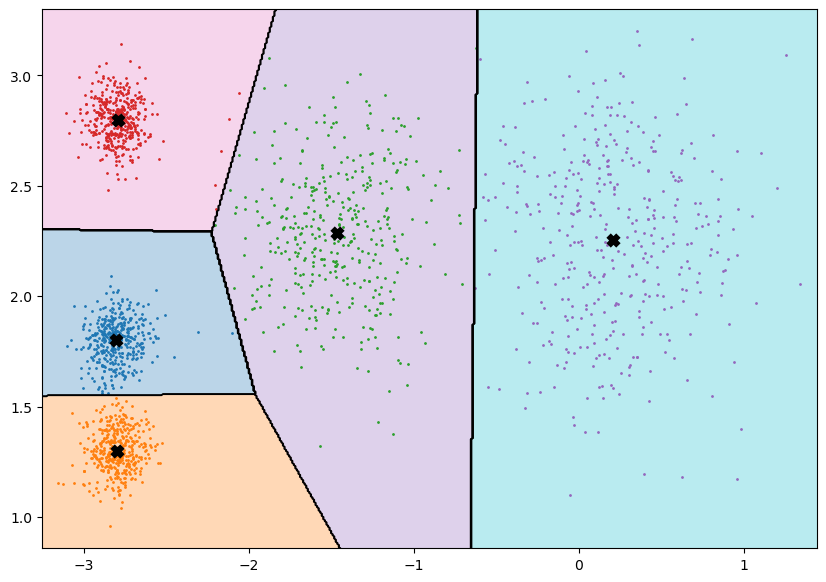

In [410]:
min_centres, min_inertia = k_means()

<hr style="border:2px solid gray">

<div style="background-color:#efdff2">

## B. Exercise Solution: K-Means with Iris Dataset [^^](#appendix) <a id='iris_ex_app'></a>

[Return to relevant section in notes](#K-means_iris) 
    
Below is an example of a function which aligns the labels of the iris dataset to the cluster labels of the K-means model, including if the number of clusters and flower types differ. This is far from the only solution.

In [104]:
def convert_pred(pred_array, length=50):

    y_pred_check = y_pred[:length]
    y_train_check = y_train[:length]

    count_mat=np.zeros((k,3))

    for i, j in zip(y_pred_check, y_train_check):

        count_mat[i,j]+=1 
        #i, the row, is the class given by the predictor
        #j, the column, is the class given by the labels

    conv=[]
    for row in count_mat:
        conv.append(np.argmax(row))

    convert_arr =[]
    for i in pred_array:
        convert_arr.append(conv[i])
        
    return (np.array(convert_arr))

In [105]:
print(convert_pred(yp))      
print()
print(y_test)

[0 2 1 2 1 1 2 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 2 2 0 0]

[0 2 1 2 2 1 2 1 1 0 0 0 1 1 1 0 0 0 2 2 0 1 0 1 0 1 2 2 0 0]


<hr style="border:2px solid gray">

<div style="background-color:#efdff2">

## C. DBSCAN Worked Code [^^](#appendix) <a id='DBSCAN_app'></a>

[Return to relevant section in notes](#DBSCAN) 
    
_References: []_

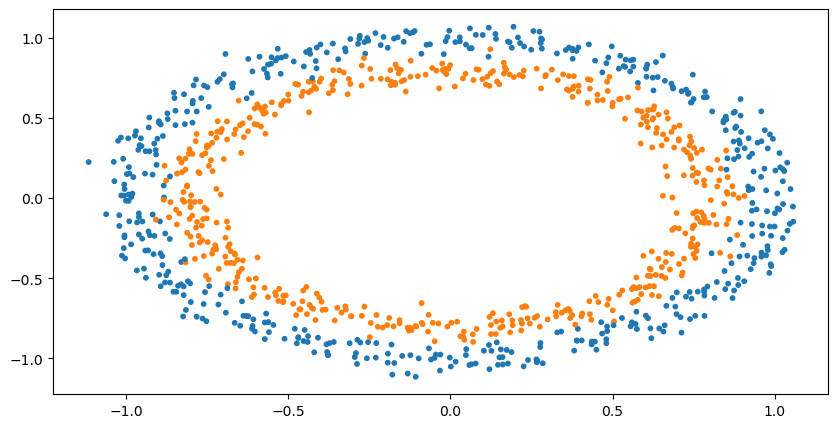

In [449]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=10, c=cmap(y), alpha=1)
